# No comments / code are final

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# This is for the plots not being cut off
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Data Cleaning

## Movement

In [2]:
movement_data = pd.Series(dtype=float)
movement_data = pd.read_csv("original_data/puryear_movement.csv", index_col=0)
movement_data.to_csv("data/cleaned_puryear_movement.csv")

## Audio

format = `%YYYY-%MM-%DD %HH:%MM:%%SS - %YYYY-%MM-%DD %HH:%MM:%%SS,%DB_Val`

In [3]:
audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("original_data/puryear_audio.csv")

# idea for repeating values, find the daily average

audio_data_cleaned = pd.Series(dtype=float)

for i in range(len(audio_data)):
    audio_data_date_string = audio_data.iloc[i]["Date"]
    cropped_audio_date_string = audio_data_date_string[0:19]
    audio_data_cleaned[cropped_audio_date_string] =  audio_data.iloc[i]["Headphone sound levels(dBASPL)"]

### Just to save time because that took a while I exported it to a new csv file

In [4]:
audio_data_cleaned.to_csv("data/temporary_audio.csv")
audio_data_cleaned = pd.read_csv("data/temporary_audio.csv")

## Combining the dates of the audio

In [5]:
audio_data_cleaned_again = pd.Series(dtype=float)

# finding the average of the daily values
sum = 1
amount = audio_data_cleaned.iloc[0][1]
audio_data_cleaned_prev_date = audio_data_cleaned.iloc[0][0][0:10]

# yes this works!
for i in range(1,len(audio_data_cleaned)):
    audio_data_cleaned_date = audio_data_cleaned.iloc[i][0][0:10]
    if audio_data_cleaned_date == audio_data_cleaned_prev_date: # if this date is the same as the day before do this
        sum = sum + 1
        amount = amount + audio_data_cleaned.iloc[i][1]
    else: # otherwise reset all the values and continue
        sum = 1
        amount = audio_data_cleaned.iloc[i][1]
        audio_data_cleaned_prev_date = audio_data_cleaned.iloc[i][0][0:10]
        audio_data_cleaned_again[audio_data_cleaned_date] = (amount / sum)

In [6]:
audio_data_cleaned_again_df = pd.DataFrame(audio_data_cleaned_again)
audio_data_cleaned_again_df.columns = ["Headphone sound levels(dBASPL)"]
audio_data_cleaned_again_df.rename_axis("Date",inplace=True)
audio_data_cleaned_again_df.to_csv("data/cleaned_puryear_audio.csv")

### Function that combines the days

In [7]:
def combine_days_in_ser(original_series):
    # finding the average of the daily values
    sum = 1
    amount = original_series.iloc[0][1]
    prev_date = original_series.iloc[0][0][0:10]

    cleaned_series = pd.Series(dtype=float)

    # print(len(original_series))
    # yes this works!
    for i in range(1,len(original_series)):
        original_series_date = original_series.iloc[i][0][0:10]
        if original_series_date == prev_date: # if this date is the same as the day before do this
            sum = sum + 1
            amount = amount + original_series.iloc[i][1]
        else: # otherwise reset all the values and continue
            sum = 1
            amount = original_series.iloc[i][1]
            prev_date = audio_data_cleaned.iloc[i][0][0:10]
            cleaned_series[original_series_date] = amount

    return cleaned_series

## Sleep

Format = `%YYYY-%MM-%DD %HH:%MM:%%SS - %YYYY-%MM-%DD %HH:%MM:%%SS,%DB_Val`

In [8]:
sleep_data = pd.Series(dtype=float)

sleep_data = pd.read_csv("original_data/puryear_sleep.csv")

# i notice how whenever there is a super small one, its always after a longer one.
# my theory is that that is when i actually pick up my phone first, but then i put it down.
# maybe i hit snooze

# first thing i am going to do is see if i can get the first value before the -, i feel like the stuff after the dash is not needed since we will have the value

# print(sleep_data)

sleep_data_cleaned = pd.Series(dtype=float)
# print(sleep_data)

for i in range(len(sleep_data)):
    current_date_string = sleep_data.iloc[i]["Date"]
    cropped_date_string = current_date_string[0:19]
    sleep_data_cleaned[cropped_date_string] =  sleep_data.iloc[i]["Time in bed(hr)"]

# i am just going to drop the time if it is less than 0.5 hours (half an hour)
sleep_data_cleaned = sleep_data_cleaned[sleep_data_cleaned>0.5]

# this will also make it possible for me to have all nighters when in reality i didnt
# i also specifically remember times where it said that i pulled all nighters when i just fell asleep with youtube playing

# idea
# combine all values that have the same day
    # issue, if i went to bed at 2am on a certain day, then went to bed at 11pm that same day. Then we have a problem

In [9]:
sleep_data_cleaned.to_csv("data/temporary_sleep.csv")
sleep_data_cleaned = pd.read_csv("data/temporary_sleep.csv")

In [10]:
sleep_data_cleaned_again = (combine_days_in_ser(sleep_data_cleaned)) # this will have issues

In [11]:
sleep_data_cleaned_again_df = pd.DataFrame(sleep_data_cleaned_again)
sleep_data_cleaned_again_df.columns =["Time in bed(hr)"]
sleep_data_cleaned_again_df.rename_axis("Date",inplace=True)

sleep_data_cleaned_again_df.to_csv("data/cleaned_puryear_sleep.csv")

# EDA

## Graphs

### Combine all 3 dataframes 

In [12]:
movement_data = pd.DataFrame(dtype=float)
movement_data = pd.read_csv("data/cleaned_puryear_movement.csv",index_col=0)

audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("data/cleaned_puryear_audio.csv",index_col=0)
# audio_data.columns = ["Date","Headphone sound levels(dBASPL)"]

sleep_data = pd.DataFrame(dtype=float)
sleep_data = pd.read_csv("data/cleaned_puryear_sleep.csv",index_col=0)
# sleep_data.columns = ["Date","Time in bed(hr)"]

In [13]:
sleep_and_audio_data = pd.merge(sleep_data,audio_data,on="Date")
all_data = pd.merge(sleep_and_audio_data,movement_data, on="Date")

### Movement

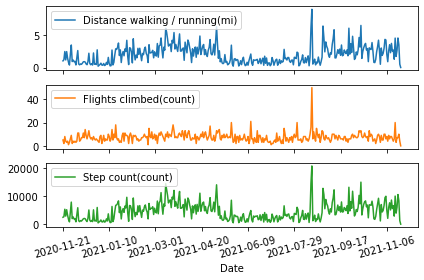

In [14]:
ax = movement_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/movement_graph.jpg",dpi=500)

### Audio

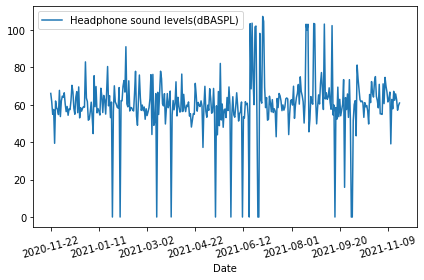

In [15]:
ax = audio_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/audio_graph.jpg",dpi=500)

### Sleep

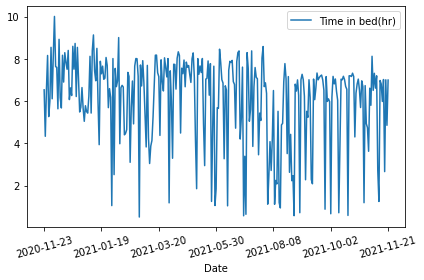

In [16]:
ax = sleep_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/sleep_graph.jpg",dpi=500)

### All Data

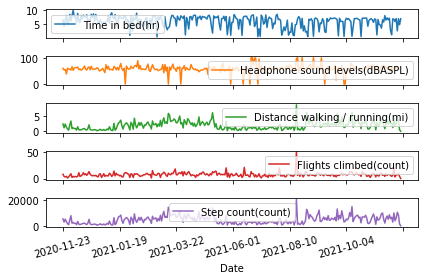

In [17]:
ax = all_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/combined_graph.jpg",dpi=500)

### Combined Graph
<img src="figures\combined_graph.jpg?" width="600"/>

## Interpolate data for VISUAL analysis

In [18]:
# making new dataframes
movement_data = pd.DataFrame(dtype=float)
movement_data = pd.read_csv("data/cleaned_puryear_movement.csv")

audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("data/cleaned_puryear_audio.csv")
audio_data.columns = ["Date","Headphone sound levels(dBASPL)"]

sleep_data = pd.DataFrame(dtype=float)
sleep_data = pd.read_csv("data/cleaned_puryear_sleep.csv")
sleep_data.columns = ["Date","Time in bed(hr)"]

### Audio

In [19]:
# interpolate audio data
audio_data.mask((audio_data["Headphone sound levels(dBASPL)"] <= 30) & (audio_data["Headphone sound levels(dBASPL)"] <= 100),inplace=True) # filtering out the outliers
audio_data.interpolate(method="cubic",inplace=True)
audio_data.fillna(method="bfill",inplace=True)

In [20]:
audio_data_combined = audio_data.merge(audio_data["Headphone sound levels(dBASPL)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
audio_data_combined.columns=["Date","Headphone sound levels(dBASPL)","Headphone sound levels(dBASPL) MOVING AVERAGE"]

audio_data_combined.set_index("Date",inplace=True)

audio_data_combined.to_csv("data/cleaned_puryear_audio_ewm.csv")

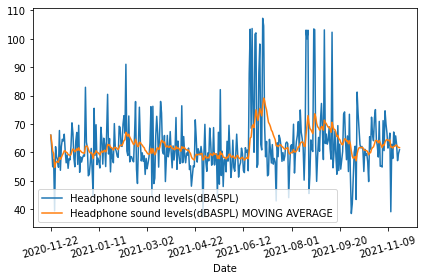

In [21]:
ax = audio_data_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_audio_graph.jpg",dpi=500)

<img src="figures\moving_avg_audio_graph.jpg" width="600"/>

### Sleep

In [22]:
# interpolate sleep data
sleep_data.interpolate(method="cubic",inplace=True)
sleep_data.fillna(method="bfill",inplace=True)

In [23]:
sleep_data_combined = sleep_data.merge(sleep_data["Time in bed(hr)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
sleep_data_combined.columns=["Date","Time in bed(hr)","Time in bed(hr) MOVING AVERAGE"]

sleep_data_combined.set_index("Date",inplace=True)

sleep_data_combined.to_csv("data/cleaned_puryear_sleep_ewm.csv")

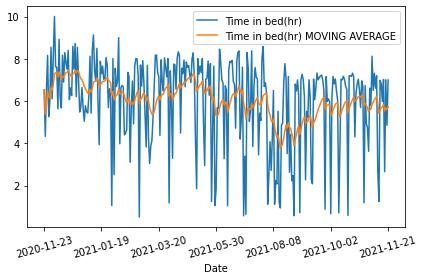

In [24]:
ax = sleep_data_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_sleep_graph.jpg",dpi=500)

<img src="figures\moving_avg_sleep_graph.jpg?" width="600"/>

### Movement

In [25]:
# interpolate movement data
movement_data.interpolate(method="cubic",inplace=True)
movement_data.fillna(method="bfill",inplace=True)

movement_data_distance = pd.DataFrame(movement_data["Distance walking / running(mi)"])
movement_data_flights = pd.DataFrame(movement_data["Flights climbed(count)"])
movement_data_step = pd.DataFrame(movement_data["Step count(count)"])

In [26]:
# reset indexes
movement_data_distance.set_index(movement_data["Date"],inplace=True)
movement_data_flights.set_index(movement_data["Date"],inplace=True)
movement_data_step.set_index(movement_data["Date"],inplace=True)

# create the combined datasets
movement_data_distance_combined = movement_data_distance.merge(movement_data_distance["Distance walking / running(mi)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_flights_combined = movement_data_flights.merge(movement_data_flights["Flights climbed(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_step_combined = movement_data_step.merge(movement_data_step["Step count(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)


In [27]:
# rename the columns
movement_data_distance_combined.columns=["Distance walking / running(mi)","Distance walking / running(mi) MOVING AVERAGE"]
movement_data_flights_combined.columns=["Flights climbed(count)","Flights climbed(count) MOVING AVERAGE"]
movement_data_step_combined.columns=["Step count(count)","Step count(count) MOVING AVERAGE"]

In [28]:
# output to csv
movement_data_distance_combined.to_csv("data/clean_puryear_movement_distance_ewm.csv")
movement_data_flights_combined.to_csv("data/clean_puryear_movement_flights_ewm.csv")
movement_data_step_combined.to_csv("data/clean_puryear_movement_step_ewm.csv")

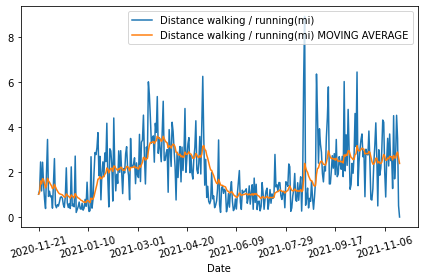

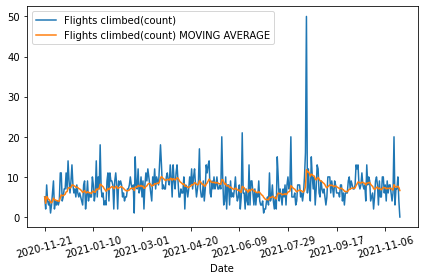

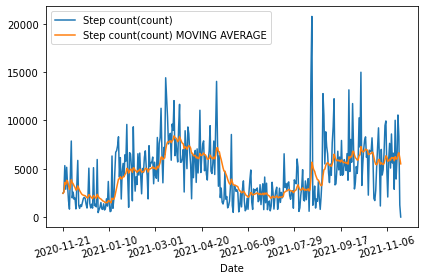

In [29]:
# create and output plots
ax = movement_data_distance_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_distance_graph.jpg",dpi=500)

ax = movement_data_flights_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_flights_graph.jpg",dpi=500)

ax = movement_data_step_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_steps_graph.jpg",dpi=500)

# Hypothesis / Testing

## T-test

##### The subject has exported his iPhones movement data, as well as his sleep and headphone volume data. Using a level of significance of 0.1, is there any major difference between the data for the weekdays vs the weekends?
* Null Hypothesis:
    * There is no significant difference: $\alpha \le 0.1$
* Alternate Hypothesis:
    * There is a significant difference: $\alpha \gt 0.1$

In [30]:
# return the date of the week of a given date in the format of 'YYYY-MM-DD'
def get_weekday(date):
    return pd.to_datetime(date).strftime('%A')

audio_df = pd.read_csv("data/cleaned_puryear_audio.csv",index_col=0)
movement_df = pd.read_csv("data/cleaned_puryear_movement.csv",index_col=0)
sleep_df = pd.read_csv("data/cleaned_puryear_sleep.csv",index_col=0)

In [31]:
def return_dataframe_of_weekend(df):
    df = df.reset_index()
    weekday_df = pd.DataFrame()
    weekday_df['Weekday'] = df['Date'].apply(get_weekday)
    df = df.join(weekday_df)
    sunday_and_saturday_df = df[df['Weekday'] == 'Sunday'].append(df[df['Weekday'] == 'Saturday']) # append the dataframe of all weekends
    sunday_and_saturday_df['Date'] = pd.to_datetime(sunday_and_saturday_df['Date']) # convert to datetime
    sunday_and_saturday_df['Date'] = sunday_and_saturday_df['Date'].dt.strftime('%Y-%m-%d') # set the format of the date to 'YYYY-MM-DD'
    sunday_and_saturday_df = sunday_and_saturday_df.sort_values(by=['Date']) # sort by date
    sunday_and_saturday_df.set_index("Date",inplace=True)
    return sunday_and_saturday_df

weekend_audio_df = return_dataframe_of_weekend(audio_df)
weekend_movement_df = return_dataframe_of_weekend(movement_df)
weekend_sleep_df = return_dataframe_of_weekend(sleep_df)

In [32]:
def return_dataframe_of_weekday(df):
    df = df.reset_index()
    weekday_df = pd.DataFrame()
    weekday_df['Weekday'] = df['Date'].apply(get_weekday)
    df = df.join(weekday_df)

    weekdays_df = df[df['Weekday'] != 'Sunday']
    weekdays_df = weekdays_df[weekdays_df['Weekday'] != 'Saturday']
    weekdays_df['Date'] = pd.to_datetime(weekdays_df['Date']) # convert to datetime
    weekdays_df['Date'] = weekdays_df['Date'].dt.strftime('%Y-%m-%d') # set the format of the date to 'YYYY-MM-DD'
    weekdays_df = weekdays_df.sort_values(by=['Date']) # sort by date
    weekdays_df.set_index("Date",inplace=True)

    return weekdays_df

weekday_audio_df = return_dataframe_of_weekday(audio_df)
weekday_movement_df = return_dataframe_of_weekday(movement_df)
weekday_sleep_df = return_dataframe_of_weekday(sleep_df)

#### Sleep

In [33]:
t,p = stats.ttest_ind(weekday_sleep_df["Time in bed(hr)"],weekend_sleep_df["Time in bed(hr)"])

print(t,p)

1.742979969284832 0.08236511393322003


* There is a difference

#### Audio

In [34]:
t,p = stats.ttest_ind(weekday_audio_df["Headphone sound levels(dBASPL)"],weekend_audio_df["Headphone sound levels(dBASPL)"])

print(t,p)

0.5317425492531812 0.59523137673974


* There is not a difference

### Movement

#### Steps

In [35]:
t,p = stats.ttest_ind(weekday_movement_df["Step count(count)"],weekend_movement_df["Step count(count)"])

print(t,p)

1.5902554522494756 0.11264533921237838


* There is no difference.

#### Distance

In [36]:
t,p = stats.ttest_ind(weekday_movement_df["Distance walking / running(mi)"],weekend_movement_df["Distance walking / running(mi)"])

print(t,p)

1.703577374227192 0.08931357658611412


* There is a difference!

#### Flights climbed

In [37]:
t,p = stats.ttest_ind(weekday_movement_df["Flights climbed(count)"],weekend_movement_df["Flights climbed(count)"])

print(t,p)

-0.8089520353557657 0.41907116610770545


* There is no difference.

## Results

| Data | P-Val | Significant Difference | Insignificant Difference |
|--|--|--|--|
| Audio | 0.59 | | x |
| Sleep | 0.08 | x | |
| Steps | 0.11 | | x |
| Distance | 0.08 | x | |
| Flights | 0.41 | | x |

As shown in the table shown above, only the sleep and distance data had a significant difference on the weekend vs the weekday.  
This means that only sleep and distance had a p value that was less than our alpha ($\alpha=0.1$)